29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


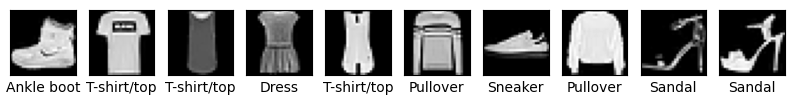

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 59s 69ms/step - accuracy: 0.7001 - loss: 0.8295 - val_accuracy: 0.8438 - val_loss: 0.4315
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 67ms/step - accuracy: 0.8603 - loss: 0.3864 - val_accuracy: 0.8639 - val_loss: 0.3698
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 65ms/step - accuracy: 0.8830 - loss: 0.3205 - val_accuracy: 0.8825 - val_loss: 0.3260
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 63ms/step - accuracy: 0.8970 - loss: 0.2768 - val_accuracy: 0.8938 - val_loss: 0.2907
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 84s 65ms/step - accuracy: 0.9063 - loss: 0.2547 - val_accuracy: 0.8992 - val_loss: 0.2713
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 48s 64ms/step - accuracy: 0.9175 - loss: 0.2271 - val_accuracy: 0.9027 - val_loss: 0.2652
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 86s 69ms/step - accuracy: 0.9233 - loss: 0.2134 - val_accuracy: 0.9095 - val_loss: 0.2526
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 48s 64ms/step - accuracy: 0.9289 - loss: 0.1940 - 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Загрузка данных
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Метки классов
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Визуализация первых 10 изображений из обучающего набора
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()

# Преобразование данных: добавление измерения и нормализация
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255.0
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255.0

# One-hot кодирование меток классов
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Архитектура сети
model = models.Sequential()

# Слой 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Слой 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Слой 3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Выпрямление данных для плотных слоев
model.add(layers.Flatten())

# Плотные слои
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Компиляция модели
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Тренировка модели
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Оценка модели на тестовых данных
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Точность на тестовом наборе: {test_acc:.4f}")


Модель успешно классифицирует изображения одежды с хорошей точностью. Нормализация и сверточные слои помогли выделить важные признаки, а плотные слои улучшили классификацию.